In [56]:
from importlib import reload
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import logging
import threading
import pacing_auction.data as data
import pacing_auction.auction as auction
reload(data)
reload(auction)

logger = logging.getLogger("playground")
logging.basicConfig(level=logging.INFO)

def print_results(sim: auction.Auction, res: auction.BRDResult):
    print(f"Result:             {type(res)}")
    print(f"Iterations:         {res.iteration}")
    print(f"Time per Iteration: {1000 * round(res.stats["time"] / res.iteration, 4)}ms")
    print(f"Time:               {res.stats['time']:.2f}s")
    if "cycle_length" in res.stats:
        print(f"Cycle length      : {res.stats["cycle_length"]}")
    print(f"Seed:               {sim.seed}")

sns.set_theme("paper")


[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.

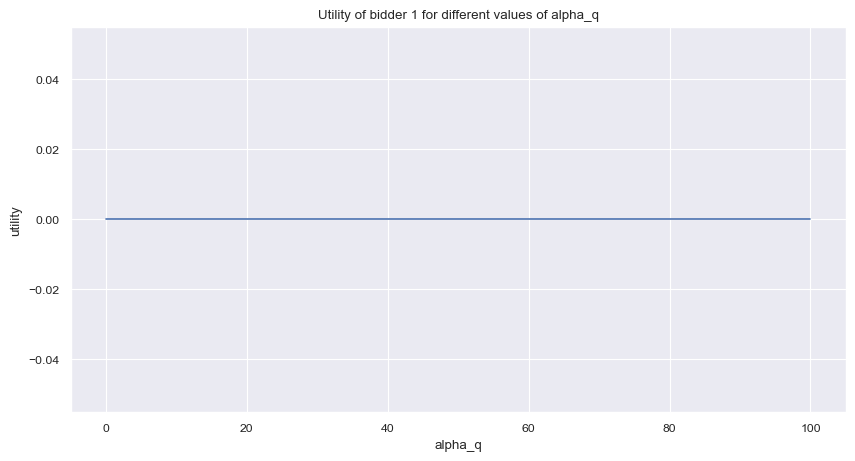

In [57]:
from pacing_auction.data import Discrete


n, m = 5, 5
q = 100

sim = auction.Auction(n, m, q=q, collect_stats=True, v_dist=Discrete([i / 10 for i in range(1, 11)]), threaded=True)

bids = sim.bids()

plt.figure(figsize=(10, 5))
plt.title(f"Utility of bidder 1 for different values of alpha_q")
plt.xlabel("alpha_q")
plt.ylabel("utility")
bidder = 1
utils = []
for alpha in range(q + 1):
    utils.append(sim.utility(*sim.allocate((bidder, alpha)))[bidder])


print(utils)
sns.lineplot(x=range(len(utils)), y=utils)
print(sim.v)
# plt.savefig("/Users/khalid/Desktop/honours-project-writeup/figures/utility-alpha-q.png", dpi=500, bbox_inches="tight")


Result:             <class 'pacing_auction.data.Cycle'>
Iterations:         224
Time per Iteration: 1.5ms
Time:               0.33s
Cycle length      : 183
Seed:               1869921826


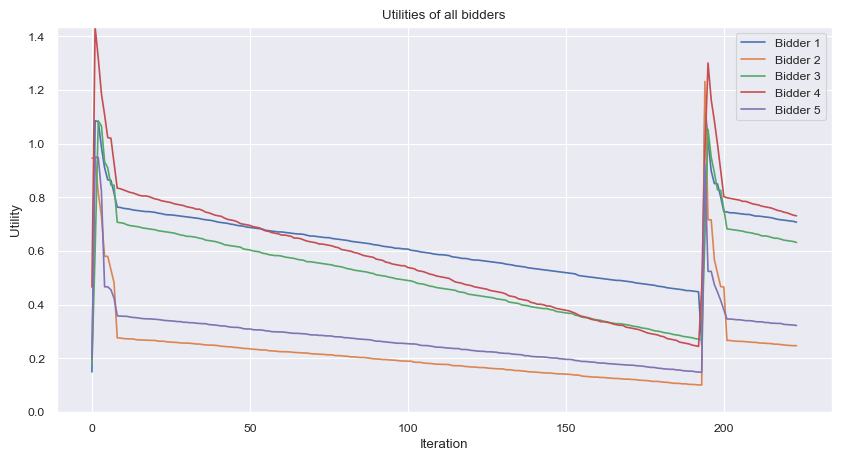

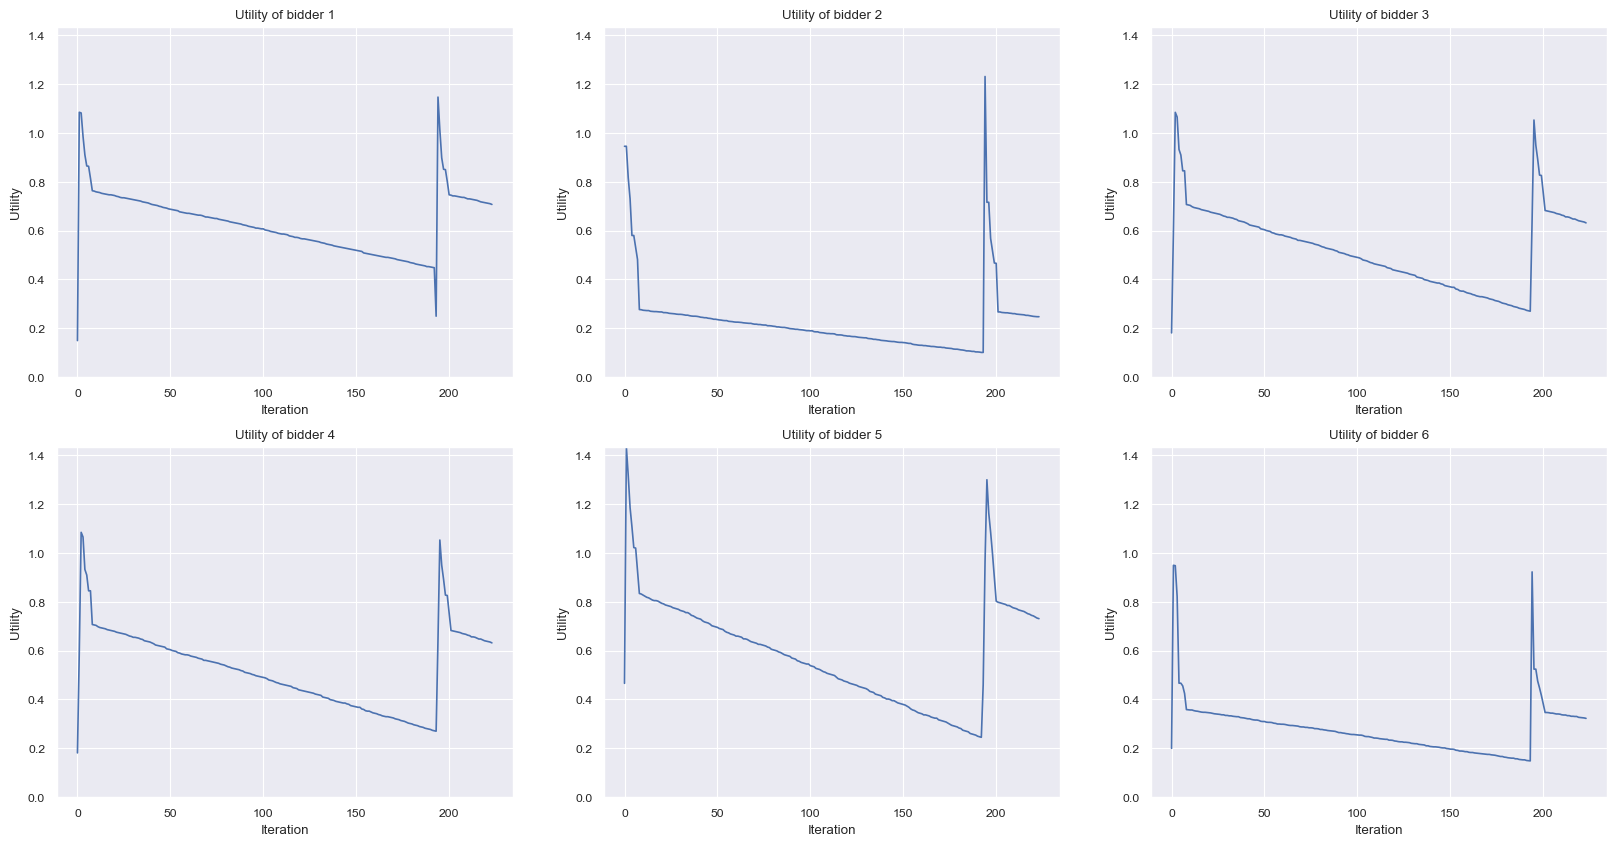

In [55]:
from math import ceil

from pacing_auction import elimination
from pacing_auction.data import Discrete


n, m = 5, 5


sim = auction.Auction(n, m, shuffle=True)
result = sim.responses()
print_results(sim, result)
utils = result.stats["utility"]

# Create separate figure for combined plot
plt.figure(figsize=(10, 5))
for i in range(n):
    sns.lineplot(data=utils[i], label=f'Bidder {i+1}')
plt.title("Utilities of all bidders")
plt.xlabel("Iteration")
plt.ylabel("Utility")
plt.ylim(0, np.max(utils))

# plt.savefig("/Users/khalid/Desktop/honours-project-writeup/figures/utilities.png", dpi=500, bbox_inches="tight")

# Original subplots
rows = 2
cols = ceil(n / rows)
fig, ax = plt.subplots(2, cols, figsize=(20, 10))

max_util = np.max(utils)

for axis in ax.flatten():
    axis.set_ylim(0, max_util)

for i in range(cols):
    sns.lineplot(data=utils[i], ax=ax[0, i])
    ax[0, i].set_title(f"Utility of bidder {i + 1}")
    ax[0, i].set_xlabel("Iteration")
    ax[0, i].set_ylabel("Utility")


    sns.lineplot(data=utils[i + cols - 1], ax=ax[1, i])
    ax[1, i].set_title(f"Utility of bidder {i + 4}")
    ax[1, i].set_xlabel("Iteration")
    ax[1, i].set_ylabel("Utility")
plt.show()
